In [85]:
import importlib
# import seesaw
#import ray
# from seesaw import load_session_data
import pandas as pd
import seesaw.user_data_analysis
importlib.reload(seesaw.user_data_analysis)

<module 'seesaw.user_data_analysis' from '/nvme_drive/orm/seesaw/seesaw/user_data_analysis.py'>

In [86]:
from seesaw.user_data_analysis import *

In [8]:
search_paths = ['./user_study_sessions_v4/']

In [12]:
mturk_df = load_mturk_batches()

In [13]:
sessions = load_session_data(search_paths[0], use_ray=False)

  0%|          | 0/527 [00:00<?, ?it/s]

In [14]:
real_session_ids = mturk_df['Answer.surveycode'].values.tolist() + ['DNykKNNIHVtNJv1pKwiTE1C0oWTXp54R']

In [15]:
session_summaries = get_session_summaries(sessions)

In [16]:
pwd

'/nvme_drive/orm/userstudy'

In [73]:
sess_review = pd.read_csv('./session review - sessions (2).csv', index_col=0).iloc[:102]
sess_review = sess_review.assign(include=sess_review['include user'].astype('bool'))
good_sessions1 = sess_review.session_path.values[sess_review.include.values]
new_sess_review = pd.read_csv('./session review - new_sessions (2).csv', index_col=0).iloc[:165]
new_sess_review = new_sess_review.assign(include=new_sess_review['Include user'].astype('bool'))
good_sessions2 = new_sess_review.session_path.values[new_sess_review.include.astype('bool').values]
good_sessions = set(good_sessions1).union(set(good_sessions2))

In [74]:
new_sess_review

,link,session_path,session_id,task_index,mode,qkey,qstr,task_duration_s,total_images_seen,include,Include user,comment,Unnamed: 13,Unnamed: 14,Unnamed: 15
93.0,http://ec2-54-227-213-119.compute-1.amazonaws....,/home2/gridsan/omoll/fastai_shared/omoll/user_...,02PvH04Sw7kokyF8vglM8usp5Tu9CBpW,0.0,pytorch,pc,police cars,239.088,13.0,False,0.0,"Relatively good, one box was on a white and bl...",NaN,NaN,NaN
97.0,http://ec2-54-227-213-119.compute-1.amazonaws....,/home2/gridsan/omoll/fastai_shared/omoll/user_...,02PvH04Sw7kokyF8vglM8usp5Tu9CBpW,1.0,pytorch,dg,dogs,141.168,17.0,False,0.0,Really Good,NaN,NaN,NaN
92.0,http://ec2-54-227-213-119.compute-1.amazonaws....,/home2/gridsan/omoll/fastai_shared/omoll/user_...,02PvH04Sw7kokyF8vglM8usp5Tu9CBpW,2.0,pytorch,cd,car with open doors,120.255,14.0,False,0.0,"I don't know what he was boxing in here, but t...",NaN,NaN,NaN
94.0,http://ec2-54-227-213-119.compute-1.amazonaws....,/home2/gridsan/omoll/fastai_shared/omoll/user_...,02PvH04Sw7kokyF8vglM8usp5Tu9CBpW,3.0,pytorch,wch,wheelchairs,61.742,11.0,False,0.0,Did wheelchair signs,NaN,NaN,NaN
95.0,http://ec2-54-227-213-119.compute-1.amazonaws....,/home2/gridsan/omoll/fastai_shared/omoll/user_...,02PvH04Sw7kokyF8vglM8usp5Tu9CBpW,4.0,pytorch,mln,cantaloupe or honeydew melon,100.685,11.0,False,0.0,Just seemed to be boxing the yellow highlight ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124.0,http://ec2-54-227-213-119.compute-1.amazonaws....,/home2/gridsan/omoll/fastai_shared/omoll/user_...,wtGZqL2FPwVzEjgQBKHXp574XrGtduCA,3.0,default,wch,wheelchairs,356.391,178.0,False,0.0,included strollers,NaN,NaN,NaN
125.0,http://ec2-54-227-213-119.compute-1.amazonaws....,/home2/gridsan/omoll/fastai_shared/omoll/user_...,wtGZqL2FPwVzEjgQBKHXp574XrGtduCA,4.0,default,mln,cantaloupe or honeydew melon,360.456,143.0,False,0.0,missed some/added some wrong,We deleted,Note: There was two cases where the person add...,NaN
126.0,http://ec2-54-227-213-119.compute-1.amazonaws....,/home2/gridsan/omoll/fastai_shared/omoll/user_...,wtGZqL2FPwVzEjgQBKHXp574XrGtduCA,5.0,default,spn,spoons or teaspoons,74.459,30.0,True,1.0,NaN,NaN,NaN,NaN
128.0,http://ec2-54-227-213-119.compute-1.amazonaws....,/home2/gridsan/omoll/fastai_shared/omoll/user_...,wtGZqL2FPwVzEjgQBKHXp574XrGtduCA,6.0,default,dst,dustpans,40.017,14.0,True,1.0,NaN,NaN,NaN,NaN


In [75]:
def make_clickable(val):
    return f'<a target="_blank" href="http://localhost:9001/session_info?path={val}">click here</a>'

In [61]:
import pickle

In [21]:
pickle.dump(sessions, open('all_sessions.pkl', 'wb'))

In [35]:
len(sessions)

527

In [38]:
sessions[0]['session_path']

'./user_study_sessions_v4/session_P4vwPqAAHbhryPs3nVHAuQ3j8IGoRaHj/qkey_wch/saved_20220413-114934/'

In [76]:
good_sessions_short = ['./' + sname[len('/home2/gridsan/omoll/fastai_shared/omoll/'):] for sname in good_sessions ]

In [87]:
new_session_tables = compute_session_tables(sessions, filter_paths=good_sessions_short)

In [98]:
new_session_tables['adf'].session_id.value_counts()

rLUfcVWLC1V46VJixBoXVAMXlcwuMGW2    8
Yk7yOQAhjCPascneLdiG6RL7mauXqs0f    8
tbGD4Wm6gtD5ScaV9rel5NUsuLhZsySq    8
P6xfgQcyQ02o27zb7poR8FrEzOOJohoK    8
M0B2txZnhIJxrIm82kK4G10tKYQjyREF    8
Tr7A9fWybEB3QUzLKKfm8Ar4yHE3I5L3    8
DRegLtqCwD0bbEars57isv1HWhdKjQCr    8
XRdorKJVSIzZSNvGWSIr1fdKjjKk33z4    8
Ppvjj8tAMWhOdCS4ROBARz2HF0j32I97    7
zaRD70psjG6Z9sCtOuxrbyMN1z6zrBzr    7
zyNm1QmrZQ6My4JJakaaw6jFKKYR7OKX    7
wtGZqL2FPwVzEjgQBKHXp574XrGtduCA    6
u79KRA4bRmJs55v5QOWhxrJpyB3uDHKo    1
Oe6iCdHDCbY75RBXP1JxC1Li5GZb5hoF    1
Name: session_id, dtype: int64

In [48]:
#new_session_tables['adf']

In [49]:
#new_session_tables['adf']

In [29]:
#df = new_session_tables['adf'].assign(per_image_times=new_session_tables['adf'].per_image_times.map(lambda x : np.array(list(x.values()))))

In [88]:
#df2 = df[[col for col in df.columns if col not in ['init_time', 'last_time', 'task_start_time', 'task_end_time']]]

In [28]:
#df2.to_parquet('/home2/gridsan/omoll/fastai_shared/omoll/session_table.parquet')

In [27]:
#new_session_tables

In [88]:
accept_df = new_session_tables['accept_df']
#seen_df = pd.DataFrame(seen_timelines)

In [89]:
accept_df

,accepted,elapsed_time,session_id,qkey,mode,session_path,duration
0,0,0.000,rLUfcVWLC1V46VJixBoXVAMXlcwuMGW2,gg,pytorch,./user_study_sessions_v4/session_rLUfcVWLC1V46...,26.121
1,1,1.977,rLUfcVWLC1V46VJixBoXVAMXlcwuMGW2,gg,pytorch,./user_study_sessions_v4/session_rLUfcVWLC1V46...,26.121
2,2,3.450,rLUfcVWLC1V46VJixBoXVAMXlcwuMGW2,gg,pytorch,./user_study_sessions_v4/session_rLUfcVWLC1V46...,26.121
3,3,4.870,rLUfcVWLC1V46VJixBoXVAMXlcwuMGW2,gg,pytorch,./user_study_sessions_v4/session_rLUfcVWLC1V46...,26.121
4,4,7.004,rLUfcVWLC1V46VJixBoXVAMXlcwuMGW2,gg,pytorch,./user_study_sessions_v4/session_rLUfcVWLC1V46...,26.121
...,...,...,...,...,...,...,...
981,6,13.528,XRdorKJVSIzZSNvGWSIr1fdKjjKk33z4,dst,pytorch,./user_study_sessions_v4/session_XRdorKJVSIzZS...,29.064
982,7,16.671,XRdorKJVSIzZSNvGWSIr1fdKjjKk33z4,dst,pytorch,./user_study_sessions_v4/session_XRdorKJVSIzZS...,29.064
983,8,24.927,XRdorKJVSIzZSNvGWSIr1fdKjjKk33z4,dst,pytorch,./user_study_sessions_v4/session_XRdorKJVSIzZS...,29.064
984,9,27.527,XRdorKJVSIzZSNvGWSIr1fdKjjKk33z4,dst,pytorch,./user_study_sessions_v4/session_XRdorKJVSIzZS...,29.064


In [80]:
accept_df.groupby(['qkey','mode','accepted']).size().reset_index()

,qkey,mode,accepted,0
0,cd,default,0,6
1,cd,default,1,6
2,cd,default,2,6
3,cd,default,3,6
4,cd,default,4,6
...,...,...,...,...
171,wch,pytorch,6,6
172,wch,pytorch,7,6
173,wch,pytorch,8,6
174,wch,pytorch,9,6


In [97]:
accept_df.to_parquet('time_view_v4.parquet')

In [90]:
qaccept_df = accept_df.groupby(['qkey','mode','accepted']).elapsed_time.apply(bootstrap_stat).reset_index()
qaccept_df = qaccept_df.assign(grp=qaccept_df[['mode', 'accepted']].apply(tuple,axis=1))

In [91]:
from plotnine import *

/nvme_drive/orm/seesaw/.seesaw_env/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/nvme_drive/orm/seesaw/.seesaw_env/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/nvme_drive/orm/seesaw/.seesaw_env/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/nvme_drive/orm/seesaw/.seesaw_env/lib/python3.8/site-packages/plotnine/facets/facet.py:487: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
/nvme_drive/orm/seesaw/.seesaw_env/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecate

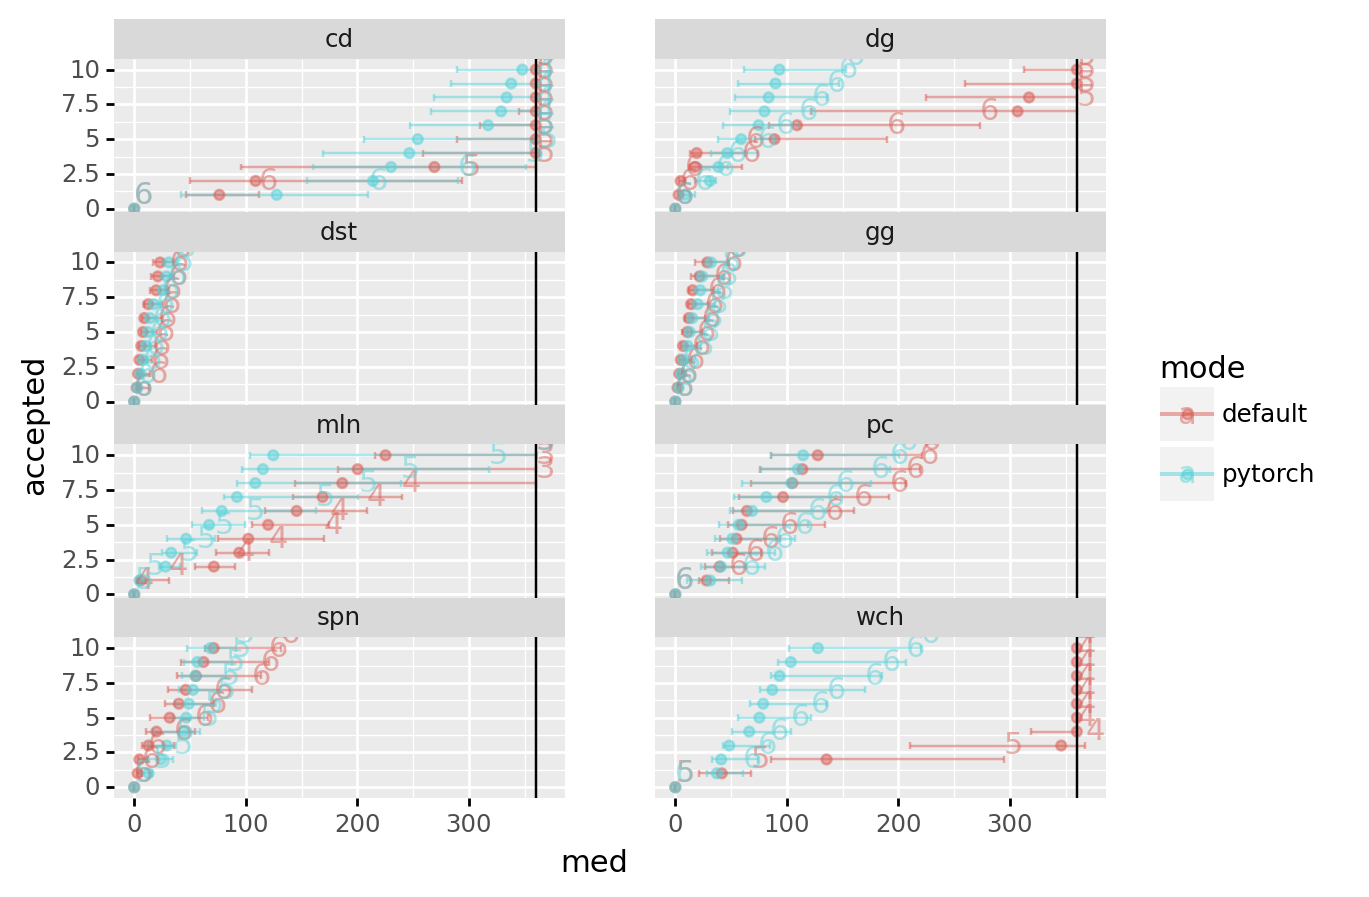

<ggplot: (8753863633719)>

In [96]:
( ggplot(qaccept_df) + 
     geom_errorbarh(aes(y='accepted', xmin='lower', xmax='high', 
                       group='grp', color='mode'), alpha=.5, position='identity') +
     geom_point(aes(y='accepted', x='med', group='grp', color='mode'), alpha=.5, position='identity') +
     geom_text(aes(y='accepted', x='high', label='n',
                    group='grp', color='mode'), va='bottom', ha='left', alpha=.5, position='identity') +
     facet_wrap(['qkey'], ncol=2) +
     annotate('vline', xintercept=6*60) +
     theme(subplots_adjust={'hspace':.2, 'wspace':.2},)
)

/nvme_drive/orm/seesaw/.seesaw_env/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/nvme_drive/orm/seesaw/.seesaw_env/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/nvme_drive/orm/seesaw/.seesaw_env/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


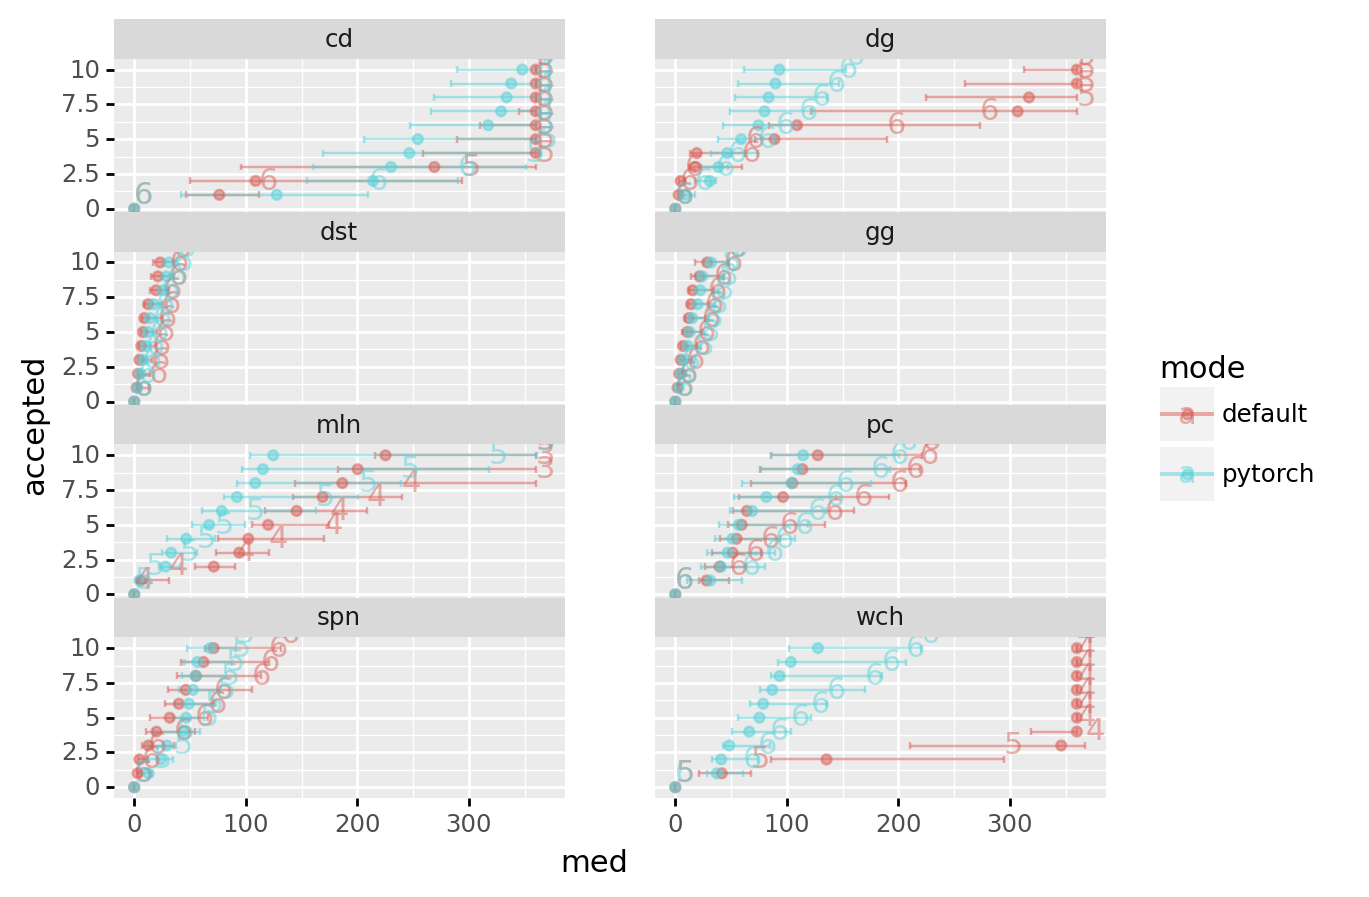

<ggplot: (8753863163561)>

In [95]:
( ggplot(qaccept_df) + 
     geom_errorbar(aes(x='accepted', ymin='lower', ymax='high', 
                       group='grp', color='mode'), alpha=.5, position='identity') +
     geom_point(aes(x='accepted', y='med',
                        group='grp', color='mode'), alpha=.5, position='identity') +
     geom_text(aes(x='accepted', y='high', label='n',
                        group='grp', color='mode'), va='bottom', ha='left', alpha=.5, position='identity') +

     facet_wrap(['qkey'], ncol=2) +
     coord_flip() +
     theme(subplots_adjust={'hspace':.2, 'wspace':.2},)
)

/nvme_drive/orm/seesaw/.seesaw_env/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/nvme_drive/orm/seesaw/.seesaw_env/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/nvme_drive/orm/seesaw/.seesaw_env/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


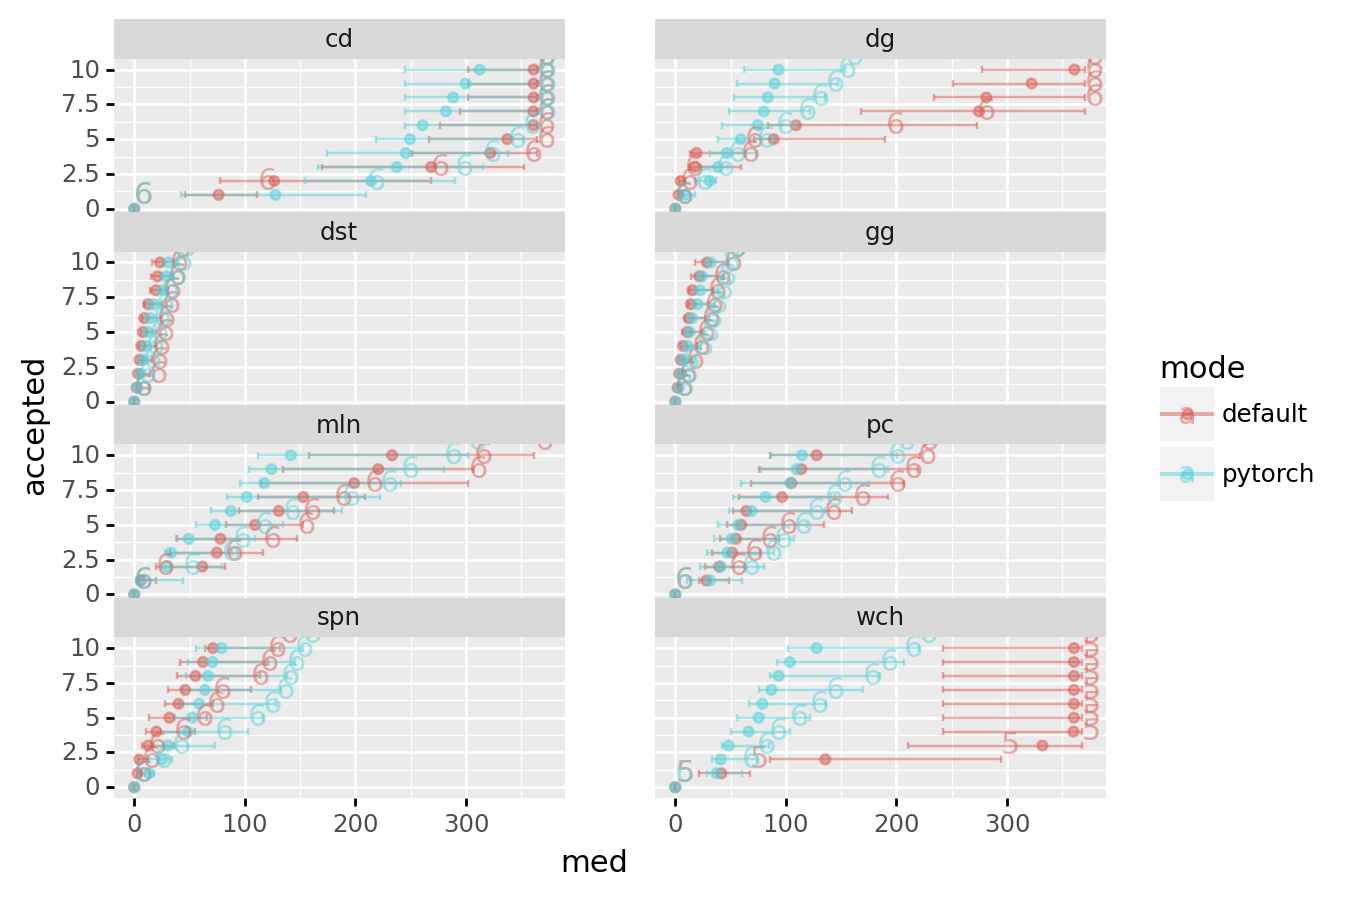

<ggplot: (8753864289651)>

In [55]:
( ggplot(qaccept_df) + 
     geom_errorbar(aes(x='accepted', ymin='lower', ymax='high', 
                       group='grp', color='mode'), alpha=.5, position='identity') +
     geom_point(aes(x='accepted', y='med',
                        group='grp', color='mode'), alpha=.5, position='identity') +
     geom_text(aes(x='accepted', y='high', label='n',
                        group='grp', color='mode'), va='bottom', ha='left', alpha=.5, position='identity') +

     facet_wrap(['qkey'], ncol=2) +
     coord_flip() +
     theme(subplots_adjust={'hspace':.2, 'wspace':.2},)
)

/home2/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home2/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home2/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


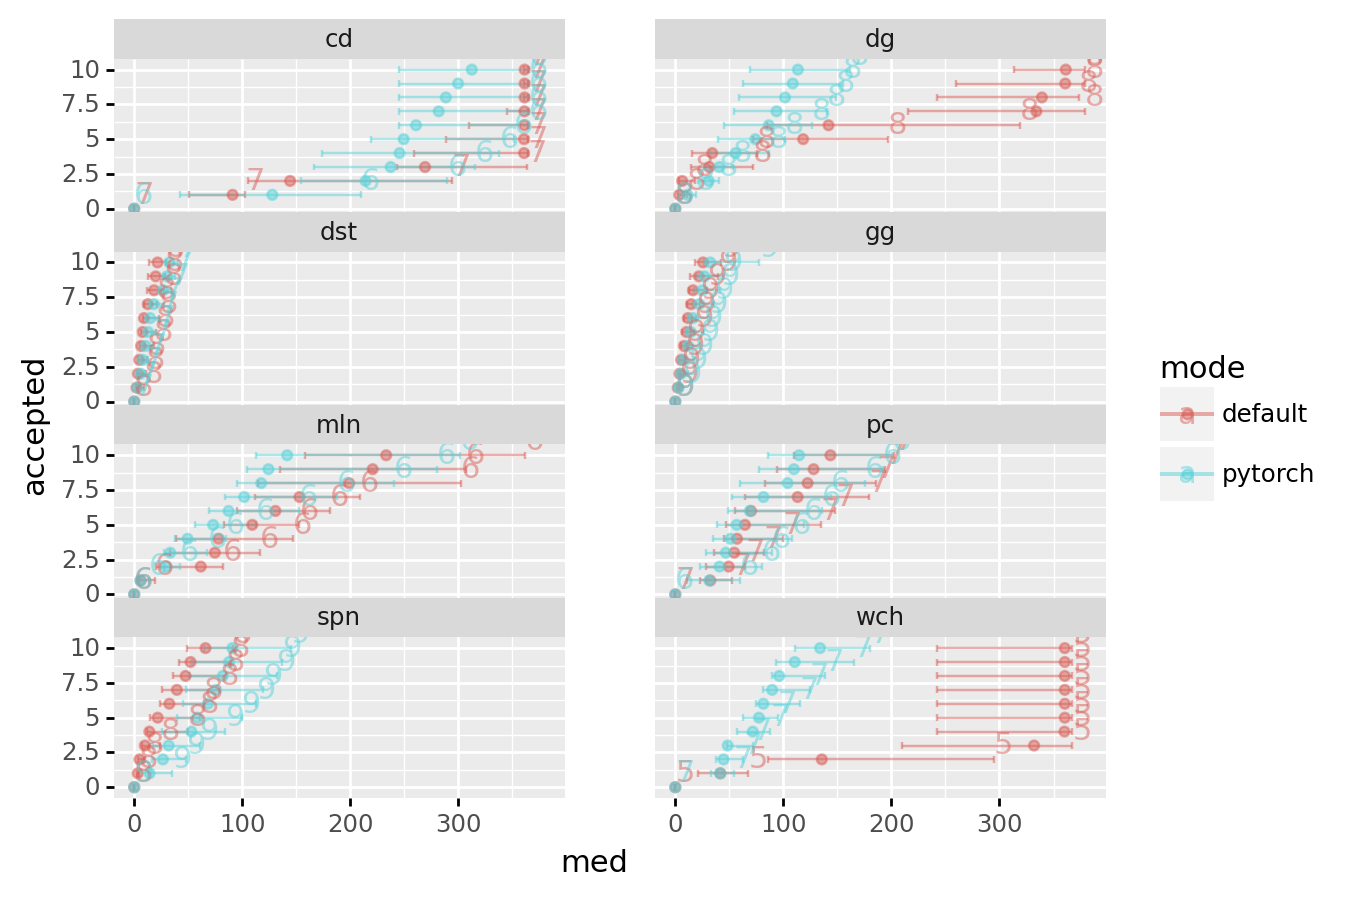

<ggplot: (8778667959537)>

In [63]:
( ggplot(qaccept_df) + 
     geom_errorbar(aes(x='accepted', ymin='lower', ymax='high', 
                       group='grp', color='mode'), alpha=.5, position='identity') +
     geom_point(aes(x='accepted', y='med',
                        group='grp', color='mode'), alpha=.5, position='identity') +
     geom_text(aes(x='accepted', y='high', label='n',
                        group='grp', color='mode'), va='bottom', ha='left', alpha=.5, position='identity') +

     facet_wrap(['qkey'], ncol=2) +
     coord_flip() +
     theme(subplots_adjust={'hspace':.2, 'wspace':.2},)
)

/home2/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home2/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home2/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


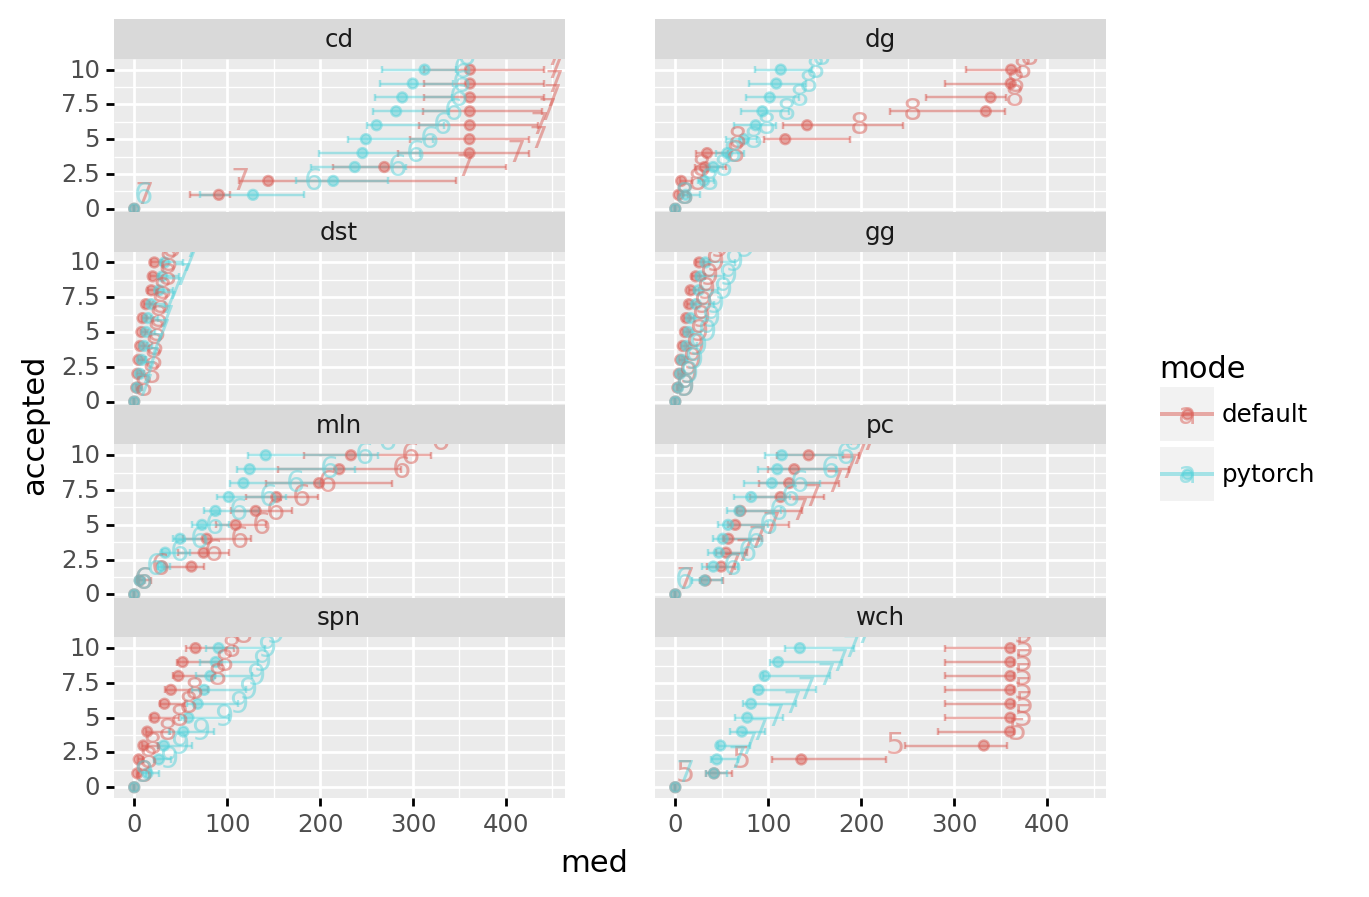

<ggplot: (8778678666506)>

In [29]:
( ggplot(qaccept_df) + 
     geom_errorbar(aes(x='accepted', ymin='lower', ymax='high', 
                       group='grp', color='mode'), alpha=.5, position='identity') +
     geom_point(aes(x='accepted', y='med',
                        group='grp', color='mode'), alpha=.5, position='identity') +
     geom_text(aes(x='accepted', y='high', label='n',
                        group='grp', color='mode'), va='bottom', ha='left', alpha=.5, position='identity') +

     facet_wrap(['qkey'], ncol=2) +
     coord_flip() +
     theme(subplots_adjust={'hspace':.2, 'wspace':.2},)
)

In [32]:
dat = np.arange(15).reshape(3,5)

In [34]:
np.median(dat, axis=0)

array([5., 6., 7., 8., 9.])

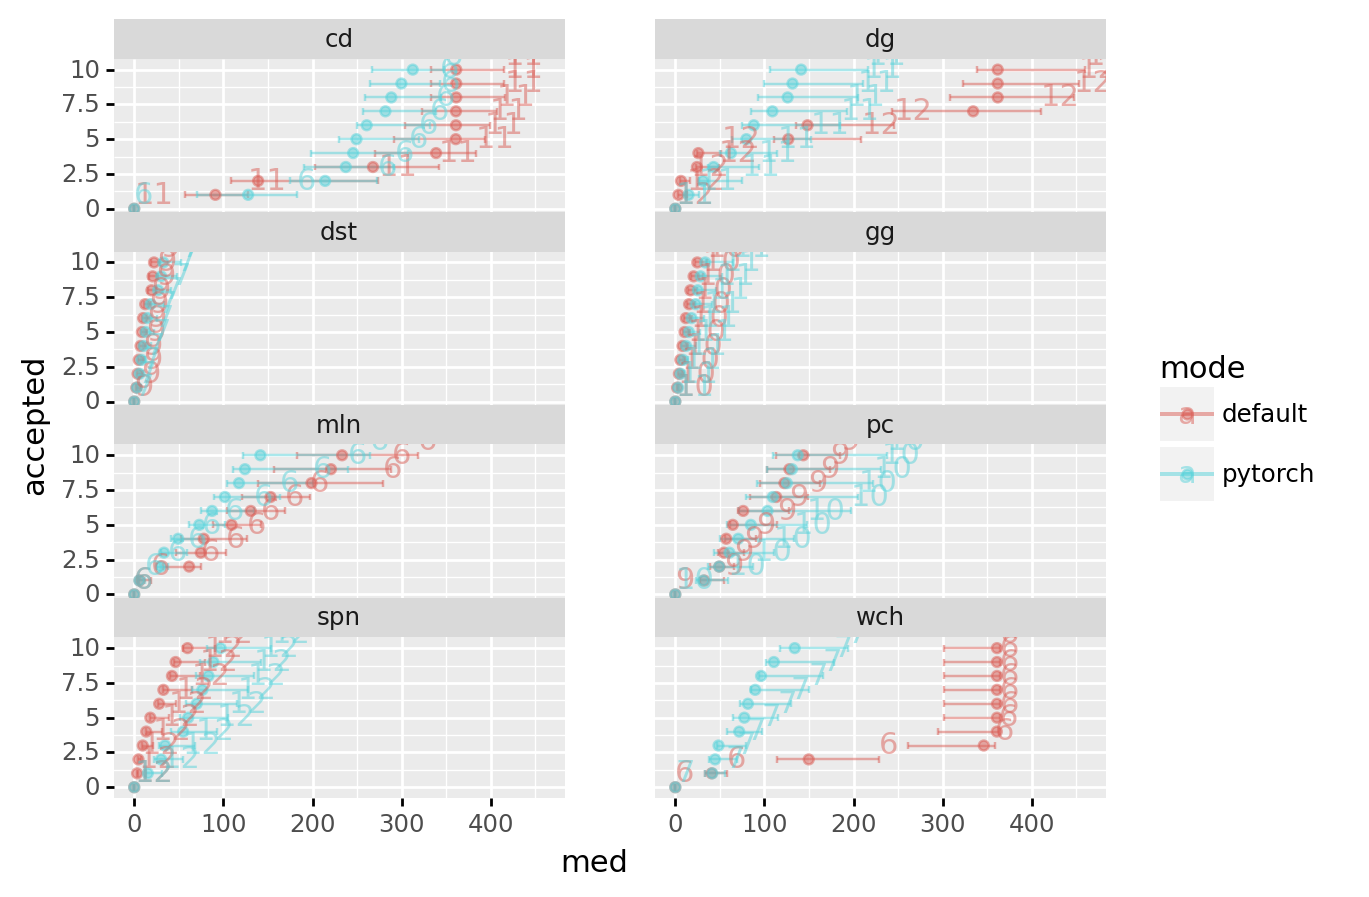

<ggplot: (8784205178143)>

In [85]:
( ggplot(qaccept_df) + 
     geom_errorbar(aes(x='accepted', ymin='lower', ymax='high', 
                       group='grp', color='mode'), alpha=.5, position='identity') +
     geom_point(aes(x='accepted', y='med',
                        group='grp', color='mode'), alpha=.5, position='identity') +
     geom_text(aes(x='accepted', y='high', label='n',
                        group='grp', color='mode'), va='bottom', ha='left', alpha=.5, position='identity') +

     facet_wrap(['qkey'], ncol=2) +
     coord_flip() +
     theme(subplots_adjust={'hspace':.2, 'wspace':.2},)
)

In [ ]:
1. split into hard / easy cases
2. go over cases that overlap with benchmark. explain timing differences
3. break down into latency / image annotation cost

4. address errors to some extent.

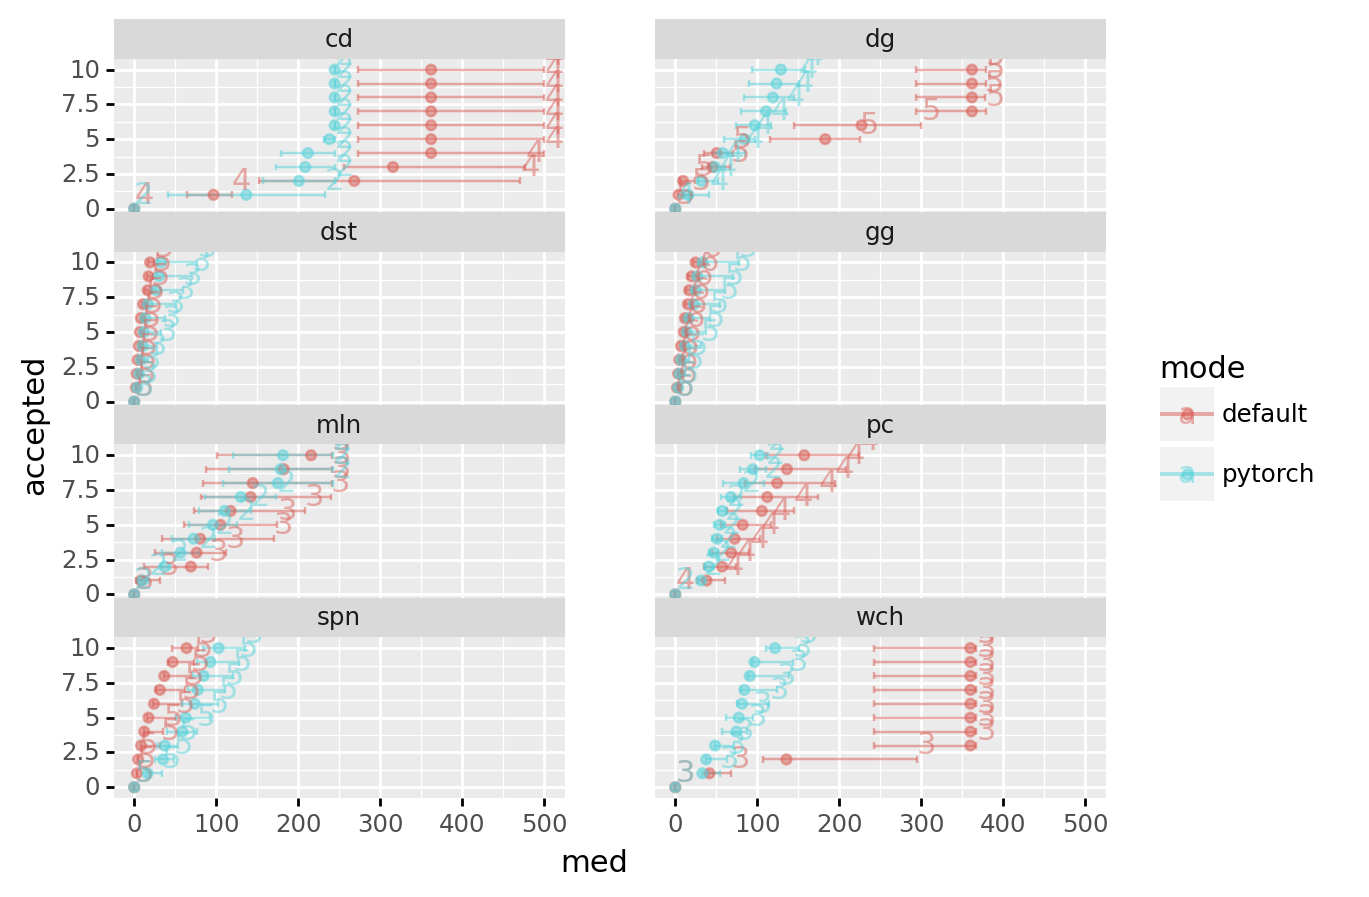

<ggplot: (8754425253518)>

In [230]:
( ggplot(qaccept_df) + 
     geom_errorbar(aes(x='accepted', ymin='lower', ymax='high', 
                       group='grp', color='mode'), alpha=.5, position='identity') +
     geom_point(aes(x='accepted', y='med',
                        group='grp', color='mode'), alpha=.5, position='identity') +
     geom_text(aes(x='accepted', y='high', label='n',
                        group='grp', color='mode'), va='bottom', ha='left', alpha=.5, position='identity') +

     facet_wrap(['qkey'], ncol=2) +
     coord_flip() +
     theme(subplots_adjust={'hspace':.2, 'wspace':.2},)
)

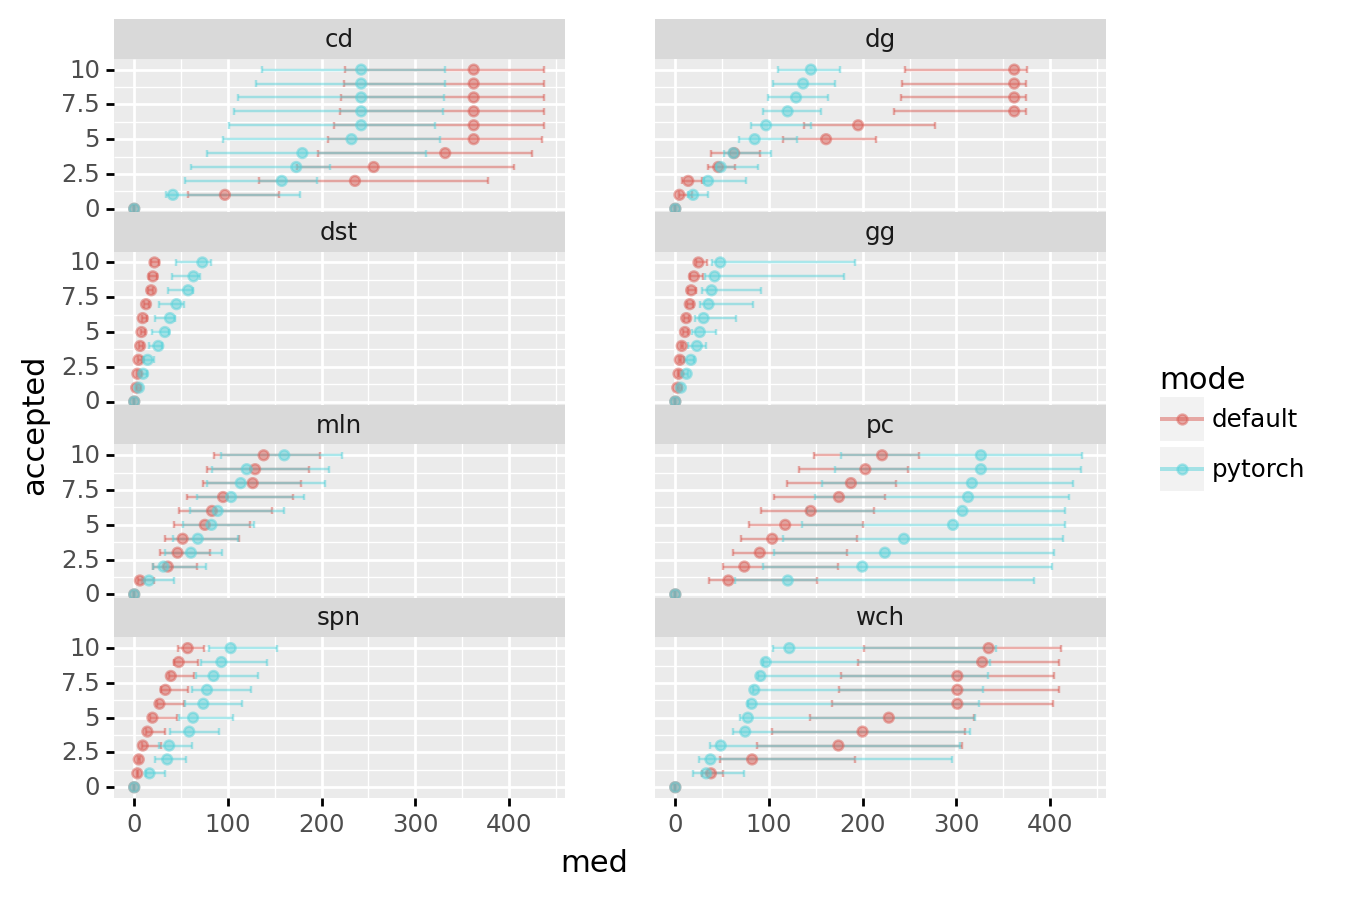

<ggplot: (8754426550827)>

In [160]:
( ggplot(qaccept_df) + 
     geom_errorbar(aes(x='accepted', ymin='lower', ymax='high', 
                       group='grp', color='mode'), alpha=.5, position='identity') +
     geom_point(aes(x='accepted', y='med',
                        group='grp', color='mode'), alpha=.5, position='identity') +
     facet_wrap(['qkey'], ncol=2) +
     coord_flip() +
     theme(subplots_adjust={'hspace':.2, 'wspace':.2},)
)